# Derivative of Matrix

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [2]:
I = img.imread(' ')  

## check the size of image

In [3]:
n_row = 
n_col =

print( )

(510, 512, 3)


## convert the input image into gray scale if it is color

In [4]:
if I.shape[2] == 3:
    I = 

## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = 

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [6]:
Dx = 


## compute the derivative of $I$ with respect to $x$-direction

In [7]:
Ix = 

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = 


## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = 

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [10]:
norm_gradient = 

## define functions for the visualization

In [11]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow( , , )
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow( , , )
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow( , , )
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow( , , )
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

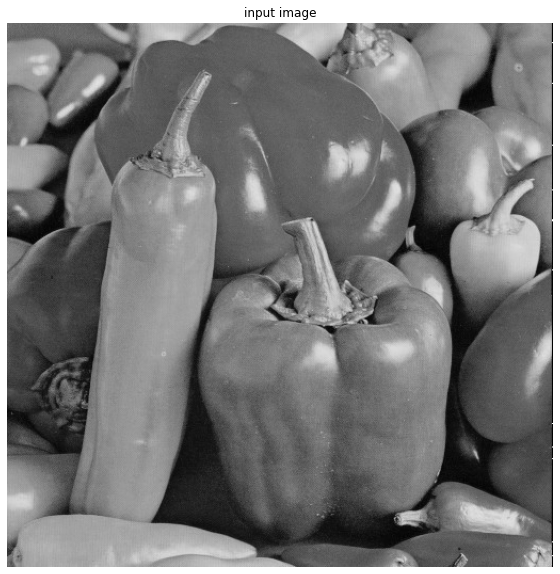

In [12]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

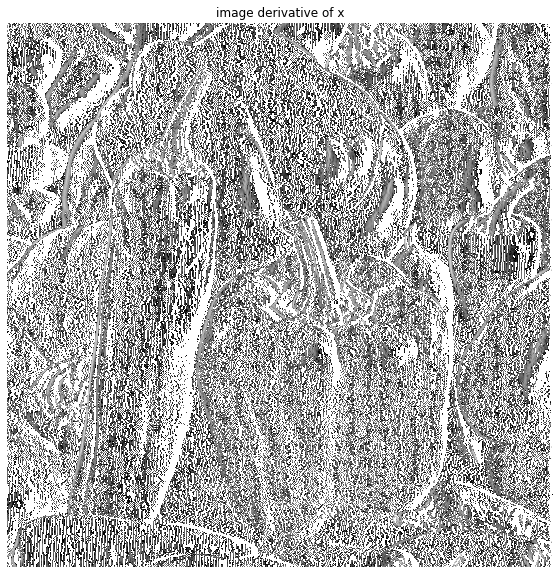

In [13]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

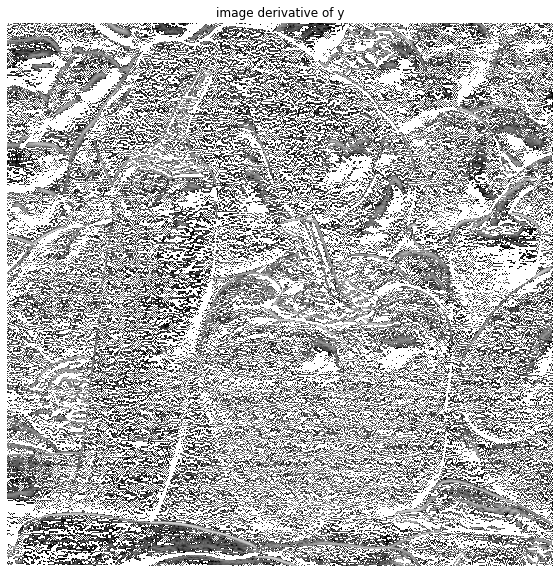

In [14]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

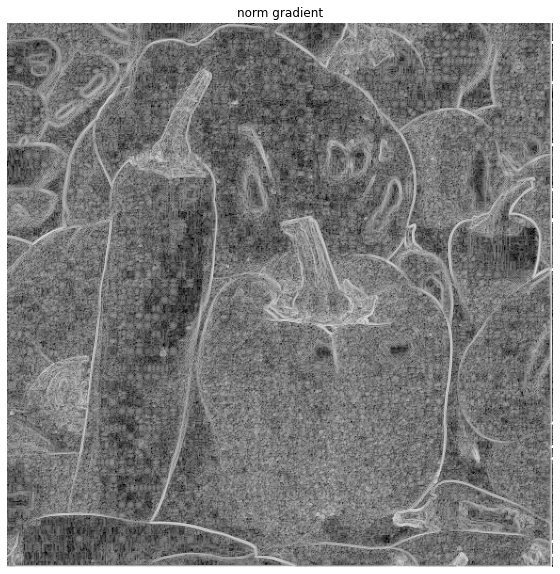

In [15]:
plot_norm_gradient(norm_gradient)